# Reproducing Fig. 2, 3, 4, 5

## Fig. 2

Parameters of the experiment:
  * architecture = 'vanilla'
  * total depth = $200$
  * kernel size = $3$
  * width = $128$
  * batch size = $1,024$
  * boundary conditions = 'periodic'
  * dataset = 'cifar10'
  * realizations = $10,000$

The settings `compute_reff_noise = False` and `compute_reff_signal = False` enable to skip the computation of the effective ranks of signal and noise: $r_\text{eff}(\mathbf{x}^l)$, $r_\text{eff}(\mathrm{d}\mathbf{x}^l)$, which are the bottlenecks of the computation.

The setting `num_computations = 4` enables to only compute the moments at $l = 50, 100, 150, 200$. If the default value `num_computations = 100` is left, the results of the experiment simply take more space on disk.

Increasing or reducing the batch size does not have much impact.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
# if computation time is an issue, it is possible to reduce:
# - the number of channels
# - the number of realizations (in which case, the histograms will be more noisy)
run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=128, 
               boundary='periodic', dataset='cifar10',
               batch_size=1024, num_realizations=10000, name_experiment='vanilla_histo', 
               num_computations=4, compute_reff_signal=False, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla_histo', name_experiment='vanilla_histo')

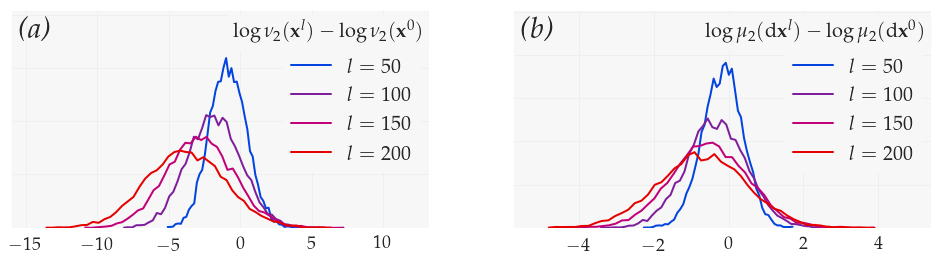

In [1]:
from manage_experiments import load_experiment
from plots import plot_vanilla_histo
%matplotlib inline

moments_vanilla_histo = load_experiment('vanilla_histo')
    # restart kernel and set use_tex=False, if no latex distribution is found
plot_vanilla_histo(moments_vanilla_histo, use_tex=True, name_fig='Fig_2')

## Fig. 3

Parameters of the experiment:
   * architecture = 'vanilla'
   * total depth = $200$
   * kernel size = $3$
   * width = $512$
   * batch size = $64$
   * boundary conditions = 'periodic'
   * dataset = 'cifar10'
   * realizations = $1,000$
    
Here `compute_reff_noise = True` and `compute_reff_signal = True` are needed to compute the effective ranks of signal and noise: $r_\text{eff}(\mathbf{x}^{l,1})$, $r_\text{eff}(\mathrm{d}\mathbf{x}^{l,1})$

Again increasing or reducing the batch size does not have much impact.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
# if computation time is an issue, it is possible to reduce:
# - the number of channels
# - the number of realizations (in which case, the expectations and 1 sigma intervals will be more noisy)
run_experiment(architecture='vanilla', total_depth=200, kernel_size=3, num_channels=512, 
               boundary='periodic', dataset='cifar10',
               batch_size=64, num_realizations=1000, name_experiment='vanilla', 
               compute_reff_signal=True, compute_reff_noise=False, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='vanilla', name_experiment='vanilla')

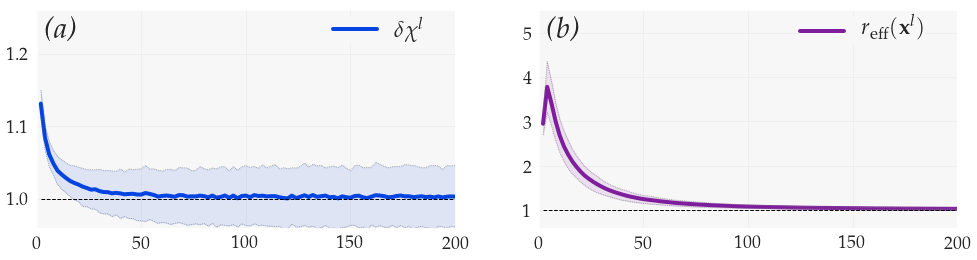

In [2]:
from manage_experiments import load_experiment
from plots import plot_vanilla
%matplotlib inline

moments_vanilla = load_experiment('vanilla')
    # restart kernel and set use_tex=False, if no latex distribution is found
plot_vanilla(moments_vanilla, use_tex=True, name_fig='Fig_3')

## Fig. 4

Parameters of the experiment:
   * architecture = 'BN_FF'
   * total depth = $200$
   * kernel size = $3$
   * width = $512$
   * batch size = $64$
   * boundary conditions = 'periodic'
   * dataset = 'cifar10'
   * realizations = $1,000$
   
Now `compute_reff_noise = True` and `compute_reff_signal = True` are required to compute both the effective rank of the signal $r_\text{eff}(\mathbf{x}^l)$ and the effective rank of the noise $r_\text{eff}(\mathrm{d}\mathbf{x}^l)$.

Here the batch size has an influence: *small batch size prevents the signal from becoming too fat-tailed*. This can be simply understood by noting that rare events cannot be arbirtrary rare for a distribution comprised of a finite number of point masses: $\frac{1}{M} \sum^M_{i=1} \delta_{p_i}$. This is illustrated in more details in the complementary notebook on fully-connected networks.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
# if computation time is an issue, it is possible to reduce:
# - the number of channels
# - the number of realizations (in which case, the expectations and 1 sigma intervals will be more noisy)
run_experiment(architecture='BN_FF', total_depth=200, kernel_size=3, num_channels=128, 
               boundary='periodic', dataset='cifar10',
               batch_size=64, num_realizations=1, name_experiment='BN_FF', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_FF', name_experiment='BN_FF')

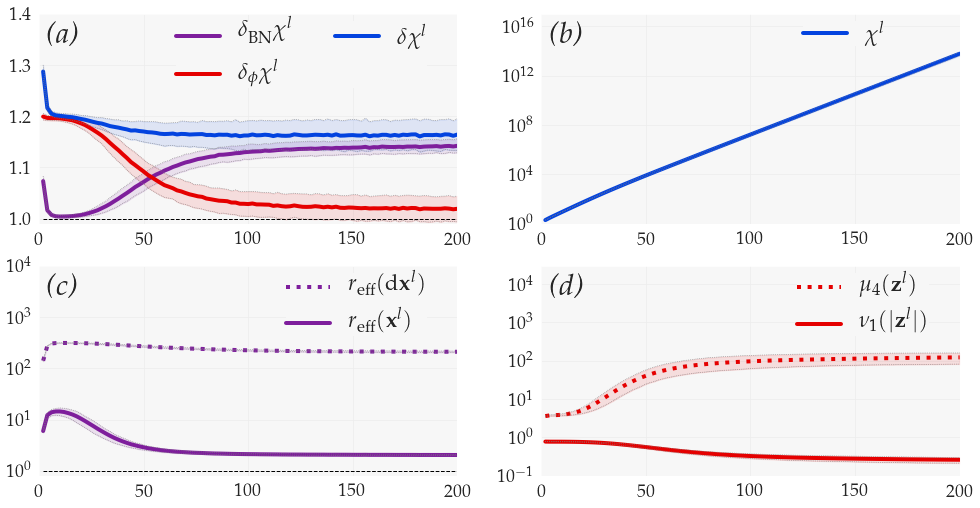

In [3]:
from manage_experiments import load_experiment
from plots import plot_BN_FF
%matplotlib inline

moments_BN_FF = load_experiment('BN_FF')
    # restart kernel and set use_tex=False, if no latex distribution is found
plot_BN_FF(moments_BN_FF, use_tex=True, name_fig='Fig_4')

## Fig. 5

Parameters of the experiment:
   * architecture = 'BN_Res'
   * total depth = $500$
   * feedforward depth inside residual units ($H$ in the paper) = $2$
   * kernel size = $3$
   * width = $512$
   * batch size = $64$
   * boundary conditions = 'periodic'
   * dataset = 'cifar10'
   * realizations = $1,000$
   
Again `compute_reff_noise = True` and `compute_reff_signal = True` are needed to compute the effective ranks of signal and noise: $r_\text{eff}(\mathbf{x}^{l,1})$, $r_\text{eff}(\mathrm{d}\mathbf{x}^{l,1})$

The batch size does not much impact since the evolution is too slow for the signal to become fat-tailed. 

The subplots (a), (c), (d) are clearly similar to the subplots (a), (c), (d) at very low depth in Fig. $4$. Since the evolution is not only slower, but also gets slower and slower, the evolutions of $\chi^l$ in Fig. $4$ and Fig. $5$ cannot be directly compared. However the perfect agreement with the power-law fit indirectly proves that the evolution of $\chi^l$ in Fig. $5$ is the logarithmic version of the evolution of $\chi^l$ in Fig. $4$.

In [ ]:
from run_experiment import run_experiment
from manage_experiments import prune_experiment

# this computation ran in the cloud, but it is left here to show the function call
# if computation time is an issue, it is possible to reduce:
# - the number of channels
# - the number of realizations (in which case, the expectations and 1 sigma intervals will be more noisy)
run_experiment(architecture='BN_Res', total_depth=500, kernel_size=3, num_channels=128, 
               boundary='periodic', dataset='cifar10', res_depth=2,
               batch_size=64, num_realizations=1, name_experiment='BN_Res', 
               compute_reff_signal=True, compute_reff_noise=True, verbose=True)

# in the npy/ folder, only the moments relevant for the plots are kept in order to limit disk space
prune_experiment(type_plot='BN_Res', name_experiment='BN_Res')

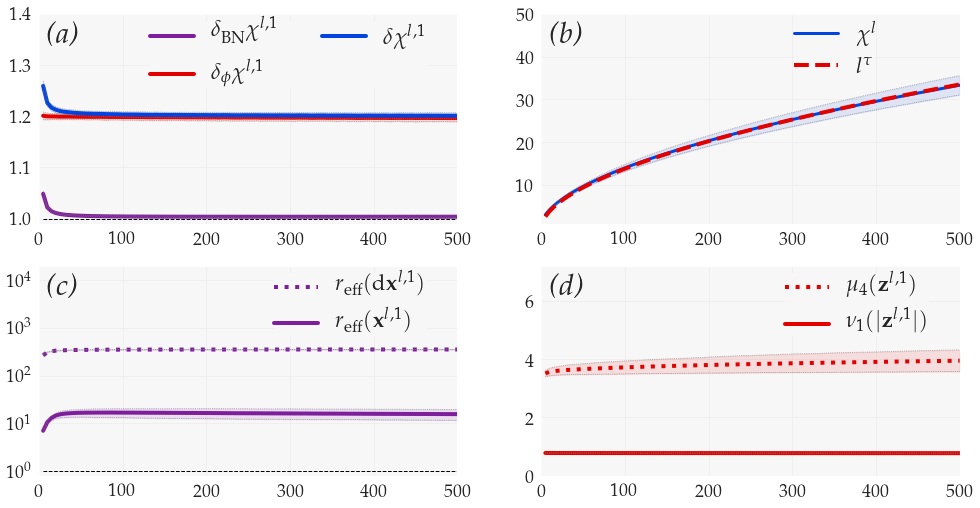

In [4]:
from manage_experiments import load_experiment
from plots import plot_BN_Res
%matplotlib inline

moments_BN_Res = load_experiment('BN_Res')
    # restart kernel and set use_tex=False, if no latex distribution is found
plot_BN_Res(moments_BN_Res, use_tex=True, name_fig='Fig_5')